In [9]:
import pandas as pd
import matplotlib.pyplot as plt

## Sessile Biomass

In [10]:

m_df = pd.read_csv('Mtot_fraction.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'M']) 

print(m_df.head())


       time         M
0       0.0  0.000750
1   25000.0  0.001003
2   50000.0  0.001291
3   75000.0  0.001610
4  100000.0  0.001953


## EPS

In [11]:

eps_df = pd.read_csv('EPS_fraction.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'EPS']) 

print(eps_df.head())


       time       EPS
0       0.0  0.000000
1   25000.0  0.000016
2   50000.0  0.000034
3   75000.0  0.000055
4  100000.0  0.000076


## Merge

In [12]:
df = m_df.merge(eps_df, on='time')
df

time         M       EPS
0          0.0  0.000750  0.000000
1      25000.0  0.001003  0.000016
2      50000.0  0.001291  0.000034
3      75000.0  0.001610  0.000055
4     100000.0  0.001953  0.000076
..         ...       ...       ...
341  8525000.0  0.007512  0.000971
342  8550000.0  0.007512  0.000971
343  8575000.0  0.007512  0.000971
344  8600000.0  0.007512  0.000971
345  8625000.0  0.007512  0.000971

[346 rows x 3 columns]

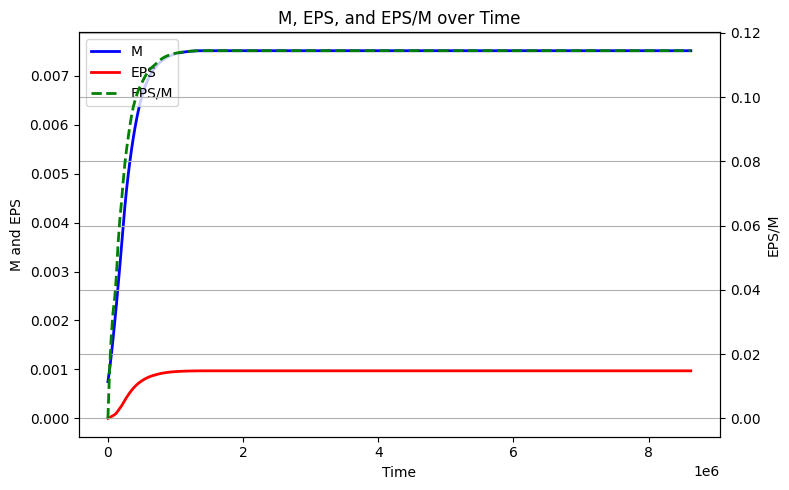

In [13]:
df['EPS_over_M'] = df['EPS'] / (df['M']+df['EPS'])

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.plot(df['time'], df['M'], label='M', color='blue', linewidth=2)
ax1.plot(df['time'], df['EPS'], label='EPS', color='red', linewidth=2)
ax1.set_xlabel('Time')
ax1.set_ylabel('M and EPS', color='black')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(df['time'], df['EPS_over_M'], label='EPS/M', color='green', linestyle='--', linewidth=2)
ax2.set_ylabel('EPS/M')
ax2.tick_params(axis='y')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('M, EPS, and EPS/M over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:

biomass_df = pd.read_csv('biomass.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'B']) 

print(biomass_df.head())


       time         B
0       0.0  0.002500
1   25000.0  0.005278
2   50000.0  0.005278
3   75000.0  0.005278
4  100000.0  0.007708


<AxesSubplot:xlabel='time'>

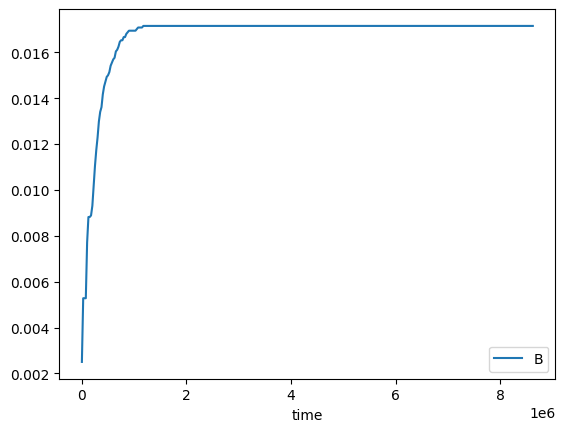

In [15]:
biomass_df.plot(x='time', y='B')